In [41]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [57]:
stripe_width = 15
gap = 20
offset = 2
image_size = 250

In [79]:
def all_indices(value, qlist):
    indices = []
    idx = -1
    while True:
        try:
            idx = qlist.index(value, idx+1)
            indices.append(idx)
        except ValueError:
            break
    return indices

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

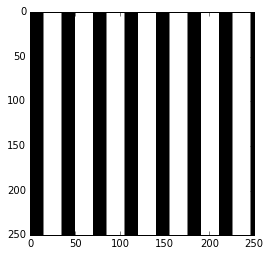

In [80]:
canvas = np.zeros((image_size, image_size))
current_col = 0
while current_col < image_size:
    if current_col + stripe_width + gap <= image_size-1:
        canvas[:, current_col:current_col+stripe_width] = 1
        current_col += stripe_width + gap
    elif current_col + stripe_width <= image_size-1:
        canvas[:, current_col:current_col+stripe_width] = 1
        current_col = image_size
    else:
        canvas[:, current_col:] = 1
        current_col = image_size
    
plt.imshow(canvas, cmap=grayify_cmap('Greys'))

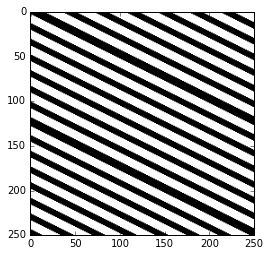

In [81]:
canvas = np.zeros((image_size, image_size))
new_canvas = np.zeros((image_size, image_size))
current_col = 0

while current_col < image_size:
    if current_col + stripe_width + gap <= image_size-1:
        canvas[:, current_col:current_col+stripe_width] = 1
        current_col += stripe_width + gap
    elif current_col + stripe_width <= image_size-1:
        canvas[:, current_col:current_col+stripe_width] = 1
        current_col = image_size
    else:
        canvas[:, current_col:] = 1
        current_col = image_size
    
for i in range(image_size-1):
    blacks = all_indices(1, list(canvas[i,:]))
    new_blacks = [(blacks[j] + offset)%image_size for j in range(len(blacks))]
    canvas[i+1, :] = 0
    canvas[i+1, new_blacks] = 1
    
plt.imshow(canvas, cmap=grayify_cmap('Greys'))